In [ ]:
!pip install gym
!pip install numpy 
!pip install matplotlib

In [ ]:
import gym 
env = gym.make('CartPole-v0')
env.reset()
for _ in range(1000):
    env.render()
    env.step(env.action_space.sample()) #random action 
env.close()

Step returns: observation, reward, done (whether it's time to reset the environment), info

Rewrite

In [1]:
import gym
env = gym.make('CartPole-v0')
sumReward = 0
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        sumReward += reward
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
print(sumReward)

[-0.0100677  -0.03361977 -0.01100441 -0.03403921]
[-0.0107401   0.16165826 -0.0116852  -0.33017373]
[-0.00750693 -0.03329543 -0.01828867 -0.04119854]
[-0.00817284 -0.22815041 -0.01911264  0.24565849]
[-0.01273585 -0.42299426 -0.01419947  0.5322521 ]
[-0.02119573 -0.22767548 -0.00355443  0.23512897]
[-0.02574924 -0.42274648  0.00114815  0.52668864]
[-0.03420417 -0.2276407   0.01168192  0.23436768]
[-0.03875699 -0.4229276   0.01636928  0.5307124 ]
[-0.04721554 -0.61827594  0.02698352  0.8285081 ]
[-0.05958106 -0.42353308  0.04355368  0.54443234]
[-0.06805172 -0.61923915  0.05444233  0.85051376]
[-0.08043651 -0.8150595   0.0714526   1.1598072 ]
[-0.09673769 -1.0110359   0.09464875  1.474011  ]
[-0.11695841 -0.81718963  0.12412897  1.2123282 ]
[-0.1333022  -0.62386894  0.14837553  0.96097857]
[-0.14577958 -0.8206399   0.1675951   1.2963545 ]
[-0.16219237 -1.0174464   0.1935222   1.6364707 ]
Episode finished after 18 timesteps
[-0.01582736  0.04277249  0.02851858  0.02398545]
[-0.01497191  

In [2]:
print(env.action_space)

Discrete(2)


In [3]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


In [4]:
print(env.observation_space.high)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [5]:
print(env.observation_space.low)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [6]:
# Q1.1

# Runs a single episode and render it
# Try running this before editing anything
import gym
import time
import itertools
import numpy as np
import gym
env = gym.make('CartPole-v0')
 # get initial state/observation
sum = 0
episodes = 20
for i in range(20):
    obs = env.reset() 
    sumReward = 0
    while True:
        # TODO: replace this `action` with something that depends on `obs` 
        if (obs[0] > 0) or (obs[2] > 0.2):
            action = 0
        elif (obs[0] < 0) or (obs[2] < -0.2):
            action = 1
        else: 
            action = env.action_space.sample()
        #action = env.action_space.sample()  # random action
        obs, reward, done, info = env.step(action)
        sumReward += reward
        env.render()
        #time.sleep(0.1)  # so it doesn't render too quickly
        if done: break
    env.close()
    sum += sumReward
print(sum/episodes)
# TODO: print out your total sum of rewards here

28.1


In [ ]:
# get initial state/observation
sum = 0
episodes = 20
for i in range(20):
    obs = env.reset() 
    sumReward = 0
    while True:
        # TODO: replace this `action` with something that depends on `obs` 

        action = env.action_space.sample()  # random action
        obs, reward, done, info = env.step(action)
        sumReward += reward
        env.render()
        #time.sleep(0.1)  # so it doesn't render too quickly
        if done: break
    env.close()
    sum += sumReward
print(sum/episodes)


1.2. [2pts] Describe the observation and action spaces of CartPole. What does each of the values mean/do? 

Observation: cart position, cart velocity, pole angle, pole angular velocity \
Action spaces: Discrete(2) 

1.3. [2pts] What distribution is used to sample initial states? (see the reset function) 

self.state = self.np_random.uniform(low=-0.05, high=0.05, size=(4,)) \
==> uniform distribution 

1.4. [2pts] What is the termination condition, which determines if the env is done? \
Termination condition: \
        Pole Angle is more than 12 degrees. \
        Cart Position is more than 2.4 (center of the cart reaches the edge of \
        the display). \
        Episode length is greater than 200. 

1.5. [2pts] Briefly describe your policy. What observation information does it use? What score did you achieve (rough maximum and average)? And how does it compare to the random policy? \
    Average score after 20 episodes: 33.85 compared to 22.15, slightly better \
    Policy: if the cart lies on one side, or if the pole leans too much on go to the other side, so that to balance the cart-pole in the middle and keep the episode as long as possible


In [ ]:
env.observation_space.high

In [ ]:
env.observation_space.low

In [ ]:
max = np.max(obs[0])

In [1]:
# Q2.1
import gym
import time
import itertools
import numpy as np
import math
import copy
env = gym.make('CartPole-v0')
def obs_normalizer(obs):
    normed = copy.deepcopy(obs)
    x_high, x_low = 4.8, -4.8
    theta_high, theta_low = 48 * math.pi / 360, -48 * math.pi / 360
    
    # clip cart velocity and pole angular velocity to [-2,2]
    normed[[1,3]] = np.clip(normed[[1,3]], -2, 2)
    # normalize
    normed[0] = (normed[0] - x_low) / (x_high - x_low)
    normed[2] = (normed[2] - theta_low) / (theta_high - theta_low)
    normed[[1,3]] = (normed[[1,3]] + 2) / 4
    
    return normed


In [2]:
### TEST 2.1
def test_normed():
    obs = env.reset()
    while True:
        obs, _, done, _ =  env.step(env.action_space.sample())
        normed = obs_normalizer(obs) 
        assert np.all(normed >= 0.0) and np.all(normed <= 1.0), '{} are outside of (0,1)'.format(normed)
        if done: break
    env.close()
    print('Passed!')
test_normed()

Passed!


In [3]:
# Q2.2

def get_bins(normed, num_bins):
    binned = np.minimum((normed * num_bins).astype(np.int32), num_bins - 1)
    return binned

In [4]:
### TEST 2.2
obs = env.reset()
env.close()

def test_binned(num_bins):
    normed = np.array([0.0, 0.2, 0.8, 1.0])
    binned = get_bins(normed, num_bins)
    assert np.all(binned >= 0) and np.all(binned < num_bins), '{} supposed to be between (0, {})'.format(binned, num_bins-1)
    assert binned.dtype == np.int, "You should also make sure to cast your answer to int using np.int() or arr.astype(np.int)" 
    
test_binned(5)
test_binned(10)
test_binned(50)
print('Passed!')

Passed!


<ipython-input-4-9d81bf46b032>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  assert binned.dtype == np.int, "You should also make sure to cast your answer to int using np.int() or arr.astype(np.int)"



2.3. [2pts] If your state has 4 values and each is binned into N possible bins, how many bins are needed to represent all unique possible states)?

4N

2.4. [2pts] After discretizing state space, is the dynamics deterministic or non-deterministic? Explain your answer in one to two sentences.


Deterministic, because the state would completely be determined after each action


In [5]:
# hyper parameters. 
num_bins = 10
alpha = 0.1
gamma = 0.99
log_n = 1000
# epsilon greedy
eps = 0.05  

obs = env.reset()

# Q-table initialized to zeros.  first 4 dims are state, last dim is for action (0,1) for left,right.
Q = np.zeros([num_bins]*len(obs)+[env.action_space.n])
# helper function to convert observation into a binned state so we can index into our Q-table
obs2bin = lambda obs: tuple(get_bins(obs_normalizer(obs), num_bins=num_bins))

s = obs2bin(obs)

print('Shape of Q Table: ', Q.shape) # you can imagine why tabular learning does not scale very well
print('Original obs {} --> binned {}'.format(obs, s))
print('Value of Q Table at that obs/state value', Q[s])

Shape of Q Table:  (10, 10, 10, 10, 2)
Original obs [ 0.0292154  -0.03600551  0.04987857  0.00212677] --> binned (5, 4, 5, 5)
Value of Q Table at that obs/state value [0. 0.]


Note: since Tabular Q learning is not scalable, Deep RL is a possible solution

In [19]:
# Q3.1
def tabular_Q_learning(num_episodes = 20000, num_bins = 10, alpha = 0.1, 
                       gamma = 0.99, log_n = 1000, eps = 0.05, average_reward_goal = 150):
    env = gym.make('CartPole-v0')
    Q = np.zeros([num_bins]*len(env.reset())+[env.action_space.n])
    rewardsEpisodes = []
    for episode in range(num_episodes):
        s = obs2bin(env.reset())
        rewardsEpisodes.append(0)    
        while True:
            greedyAction = np.argmax(Q[s])
            if np.random.rand() > eps:
                action = greedyAction
            else: 
                action = np.random.choice(2)
            obs, r, done, _ = env.step(action)
            o = obs2bin(obs)
            Q[s][action] = Q[s][action] + alpha*(r+gamma*np.max(Q[o])-Q[s][action])
            rewardsEpisodes[episode] += r
            s = o
            if done: break
        if (episode%log_n == 0):
            average_reward = np.mean(rewardsEpisodes[-log_n:])
            print("At episode {} the average return of the past {} iterations is {}".format(episode, log_n, average_reward))
            if (average_reward_goal is not None) and (average_reward > average_reward_goal): break 
    env.close() 
    return Q, rewardsEpisodes
_, _ = tabular_Q_learning()

At episode 0 the average return of the past 1000 iterations is 9.0
At episode 1000 the average return of the past 1000 iterations is 9.645
At episode 2000 the average return of the past 1000 iterations is 10.468
At episode 3000 the average return of the past 1000 iterations is 10.439
At episode 4000 the average return of the past 1000 iterations is 10.335
At episode 5000 the average return of the past 1000 iterations is 10.405
At episode 6000 the average return of the past 1000 iterations is 25.407
At episode 7000 the average return of the past 1000 iterations is 82.246
At episode 8000 the average return of the past 1000 iterations is 145.532
At episode 9000 the average return of the past 1000 iterations is 165.129


At episode 0 the average return of the past 1000 iterations is 10.0
At episode 1000 the average return of the past 1000 iterations is 9.844
At episode 2000 the average return of the past 1000 iterations is 9.985
At episode 3000 the average return of the past 1000 iterations is 10.084
At episode 4000 the average return of the past 1000 iterations is 10.111
At episode 5000 the average return of the past 1000 iterations is 10.034
At episode 6000 the average return of the past 1000 iterations is 10.126
At episode 7000 the average return of the past 1000 iterations is 10.022
At episode 8000 the average return of the past 1000 iterations is 10.063
At episode 9000 the average return of the past 1000 iterations is 10.03
At episode 10000 the average return of the past 1000 iterations is 10.124
At episode 11000 the average return of the past 1000 iterations is 10.122
At episode 12000 the average return of the past 1000 iterations is 14.542
At episode 13000 the average return of the past 1000 ite

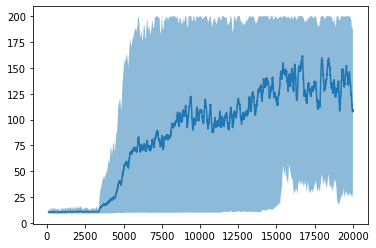

In [27]:
import matplotlib.pyplot as plt
from bottleneck import move_mean

num_episodes = 20000

min_returns = np.full(num_episodes, np.inf)
max_returns = np.full(num_episodes, 0)
mean_returns = np.full(num_episodes, 0)

plt.close()
for i in range(5):
    _, returns = tabular_Q_learning(num_episodes=num_episodes, average_reward_goal=None)

    min_returns = np.minimum(min_returns, returns)
    max_returns = np.maximum(max_returns, returns)
    mean_returns = mean_returns + np.array(returns)/5

window_size = 100
plt.plot(move_mean(mean_returns, window_size))
plt.fill_between(np.arange(num_episodes),
                move_mean(min_returns, window_size),
                move_mean(max_returns, window_size),
                alpha=0.5)


4.2. [10pts] $\epsilon$-greedy. How sensitive are the results to the value of $\epsilon$? First, write down your prediction of what would happen if $\epsilon$ is set to various values, including for example [0, 0.05, 0.25, 0.5].

TODO: answer here

Now run the experiment and observe the impact on the algorithm. Report the results below.

Clearly epsilon makes significant differences (basic exploration/exploitation tradeoff)

In [21]:
_, _ = tabular_Q_learning(eps = 0)

At episode 0 the average return of the past 1000 iterations is 9.0
At episode 1000 the average return of the past 1000 iterations is 9.364
At episode 2000 the average return of the past 1000 iterations is 9.376
At episode 3000 the average return of the past 1000 iterations is 9.373
At episode 4000 the average return of the past 1000 iterations is 9.349
At episode 5000 the average return of the past 1000 iterations is 9.361
At episode 6000 the average return of the past 1000 iterations is 9.375
At episode 7000 the average return of the past 1000 iterations is 9.352
At episode 8000 the average return of the past 1000 iterations is 9.371
At episode 9000 the average return of the past 1000 iterations is 9.343
At episode 10000 the average return of the past 1000 iterations is 9.34
At episode 11000 the average return of the past 1000 iterations is 9.362
At episode 12000 the average return of the past 1000 iterations is 9.366
At episode 13000 the average return of the past 1000 iterations is 

In [22]:
_, _ = tabular_Q_learning(eps = 0.25)

At episode 0 the average return of the past 1000 iterations is 9.0
At episode 1000 the average return of the past 1000 iterations is 21.816
At episode 2000 the average return of the past 1000 iterations is 84.053
At episode 3000 the average return of the past 1000 iterations is 127.415
At episode 4000 the average return of the past 1000 iterations is 147.043
At episode 5000 the average return of the past 1000 iterations is 159.062


In [23]:
_, _ = tabular_Q_learning(eps = 0.5)

At episode 0 the average return of the past 1000 iterations is 9.0
At episode 1000 the average return of the past 1000 iterations is 58.369
At episode 2000 the average return of the past 1000 iterations is 86.9
At episode 3000 the average return of the past 1000 iterations is 89.396
At episode 4000 the average return of the past 1000 iterations is 96.046
At episode 5000 the average return of the past 1000 iterations is 97.596
At episode 6000 the average return of the past 1000 iterations is 95.559
At episode 7000 the average return of the past 1000 iterations is 96.506
At episode 8000 the average return of the past 1000 iterations is 99.928
At episode 9000 the average return of the past 1000 iterations is 97.565
At episode 10000 the average return of the past 1000 iterations is 96.178
At episode 11000 the average return of the past 1000 iterations is 92.739
At episode 12000 the average return of the past 1000 iterations is 93.171
At episode 13000 the average return of the past 1000 ite

Improve: use DQN to avoid overestimation/ positive bias. Use decay epsilon because when we nearly converge, don't need too much exploration, and also initialize Q randomly rather than 0. Moreover, since Q is not scalable as discussed above, if we want to scale, can consider policy gradnet of deep methods. 

In [25]:
def double_Q_learning(num_episodes = 20000, num_bins = 10, alpha = 0.1, 
                       gamma = 0.99, log_n = 1000, eps = 0.05, average_reward_goal = 150):
    env = gym.make('CartPole-v0')
    Q1 = np.random.sample([num_bins]*len(env.reset())+[env.action_space.n])
    Q2 = np.random.sample([num_bins]*len(env.reset())+[env.action_space.n])
    rewardsEpisodes = []
    averages = []
    for episode in range(num_episodes+1):
        s = obs2bin(env.reset())
        rewardsEpisodes.append(0)    
        while True:
            greedyAction = np.argmax(Q1[s]+Q2[s])
            if np.random.rand() > eps:
                action = greedyAction
            else: 
                action = np.random.choice(2)
            obs, r, done, _ = env.step(action)
            next_o = obs2bin(obs)
            if np.random.rand() > 0.5: 
                Q1[s][action] = Q1[s][action] + alpha*(r+Q2[next_o][np.argmax(Q1[next_o])]-Q1[s][action])
            else: 
                Q2[s][action] = Q2[s][action] + alpha*(r+Q1[next_o][np.argmax(Q2[next_o])]-Q2[s][action])
            rewardsEpisodes[episode] += r
            s = next_o
            if done: break
        if (episode%log_n == 0):
            average_reward = np.mean(rewardsEpisodes[-log_n:])
            averages.append(average_reward)
            print("At episode {} the average return of the past {} iterations is {}".format(episode, log_n, average_reward))
            if (average_reward_goal is not None) and (average_reward > average_reward_goal): break 
        eps = 1/(1+episode//100) #same idea with rate-decay learning, adam optimization
    env.close() 
    return Q, rewardsEpisodes 
_, _ = double_Q_learning()

At episode 0 the average return of the past 1000 iterations is 20.0
At episode 1000 the average return of the past 1000 iterations is 76.432
At episode 2000 the average return of the past 1000 iterations is 151.256


Yay, improved significantly 